<a href="https://colab.research.google.com/github/wangbxj1234/jicaowu6/blob/main/torchcifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#torchvision 数据集的输出是范围在[0,1]之间的 PILImage，我们将他们转换成归一化范围为[-1,1]之间的张量 Tensors。
#前面的（0.5，0.5，0.5） 是 R G B 三个通道上的均值， 后面(0.5, 0.5, 0.5)是三个通道的标准差，
#Normalize对每个通道执行以下操作：image =（图像-平均值）/ std
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
#dataloader本质上是一个可迭代对象，可以使用iter()进行访问，采用iter(dataloader)返回的是一个迭代器，然后可以使用next()访问。也可以使用enumerate(dataloader)的形式访问。
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:03<00:00, 46951811.56it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


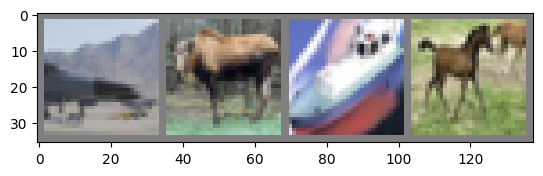

     plane       deer       ship      horse


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize，把0到1范围变回-1到1
    npimg = img.numpy()     # 将torch.FloatTensor 转换为numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #因为在plt.imshow在现实的时候输入的是（imagesize,imagesize,channels）,而def imshow(img,text,should_save=False)中，参数img的格式为（channels,imagesize,imagesize）,这两者的格式不一致，
    #我们需要调用一次np.transpose函数，即np.transpose(npimg,(1,2,0))，将npimg的数据格式由（channels,imagesize,imagesize）转化为（imagesize,imagesize,channels）,进行格式的转换后方可进行显示。
    plt.show()


# get some random training images
#dataloader本质上是一个可迭代对象，可以使用iter()进行访问，采用iter(dataloader)返回的是一个迭代器，然后可以使用next()访问。也可以使用enumerate(dataloader)的形式访问。
#iter(dataloader)访问时，imgs在前，labels在后，分别表示：图像转换0~1之间的值，labels为标签值。并且imgs和labels是按批次进行输入的。
dataiter = iter(trainloader)
#images, labels = dataiter.next()
images, labels = next(dataiter)

# show images画图
imshow(torchvision.utils.make_grid(images))
# print labels给图加标签
print(' '.join('%10s' % classes[labels[j]] for j in range(4)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):#########################模型构建
  def __init__(self):# 2ge __
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

cnn = Net()

In [6]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(),lr=0.001,momentum=0.9)


In [7]:
for epoch in range(2):

  running_loss = 0.0

  for i,data in enumerate(trainloader,0):#enumerate()用于可迭代\可遍历的数据对象组合为一个索引序列，同时列出数据和数据下标.上面代码的0表示从索引从0开始，假如为1的话，那索引就从1开始。
    inputs,labels = data
    optimizer.zero_grad()
    outputs = cnn(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()#get tensor's value
    if i%2000 == 1999: #print every 2000 batches
        print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

print('Finished Training')



[1,  2000] loss: 2.184
[1,  4000] loss: 1.842
[1,  6000] loss: 1.676
[1,  8000] loss: 1.579
[1, 10000] loss: 1.526
[1, 12000] loss: 1.469
[2,  2000] loss: 1.397
[2,  4000] loss: 1.360
[2,  6000] loss: 1.357
[2,  8000] loss: 1.327
[2, 10000] loss: 1.298
[2, 12000] loss: 1.285
Finished Training


In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1) #下划线代表只输出index不输出value，1代表按照行取最大值（如果是0就是按照列取最大值）。
        total += labels.size(0)#batch size 打印shape，发现就是size[4]

        correct += (predicted == labels).sum().item()#.sum() #将向量里各个维度所有的值相加，得到的仍是tensor类别的int值 #item：转为数字

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


In [9]:
class_correct = list(0. for i in range(10)) #创建10个0的列表
class_total = list(0. for i in range(10))
with torch.no_grad():#以下内容不会参与反向传播
    for data in testloader:
        images, labels = data
        outputs = cnn(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 69 %
Accuracy of  bird : 51 %
Accuracy of   cat : 37 %
Accuracy of  deer : 46 %
Accuracy of   dog : 39 %
Accuracy of  frog : 71 %
Accuracy of horse : 43 %
Accuracy of  ship : 81 %
Accuracy of truck : 37 %
